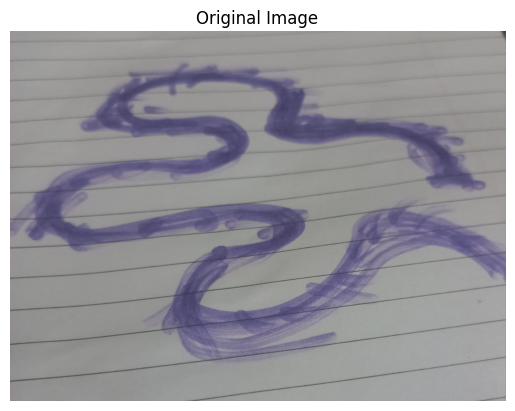

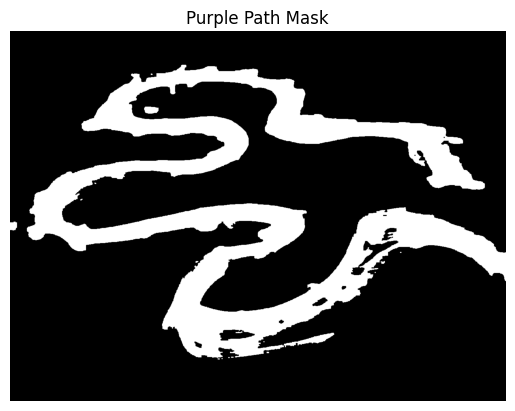

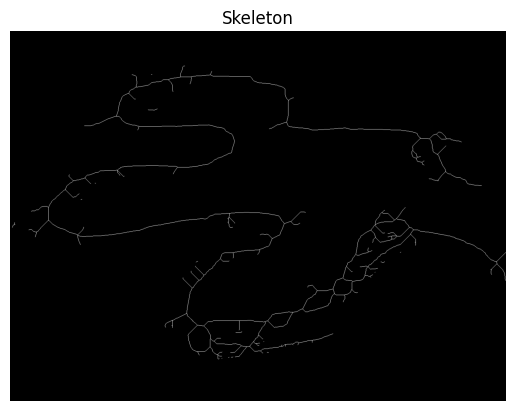

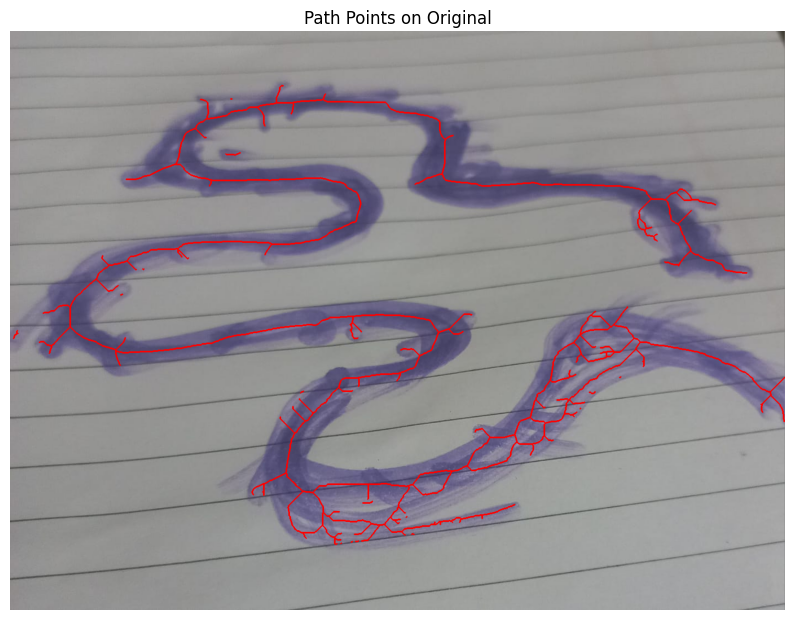

Saved 7844 coordinates to paths.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from skimage.morphology import skeletonize
from skimage import img_as_bool, img_as_ubyte

# Load to original image
file_path = "original_image.jpg"
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range for purple colour
lower = np.array([120, 40, 40])
upper = np.array([170, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

# Clean up small noise by using morph operations
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Show the cleaned mask
plt.imshow(mask, cmap='gray')
plt.title("Purple Path Mask")
plt.axis('off')
plt.show()

# Skeletonize the binary mask
binary = img_as_bool(mask)
skeleton = skeletonize(binary)
skeleton_uint8 = img_as_ubyte(skeleton)

# Display the skeleton
plt.imshow(skeleton_uint8, cmap='gray')
plt.title("Skeleton")
plt.axis('off')
plt.show()

# Get coordinates of skeleton pixels
coords = np.column_stack(np.where(skeleton > 0))

# Draw coordinates on the image as red dots
img_with_points = img_rgb.copy()
for y, x in coords:
    cv2.circle(img_with_points, (x, y), 1, (255, 0, 0), -1)

# Display the image including path points
plt.figure(figsize=(10, 8))
plt.imshow(img_with_points)
plt.title("Path Points on Original")
plt.axis('off')
plt.show()

df = pd.DataFrame(coords, columns=["x", "y"])
df.to_csv("paths.csv", index=False)
print(f"Saved {len(coords)} coordinates to paths.csv")

# Download the CSV file for the coordinates
files.download("paths.csv")